In [40]:
install.packages("pROC")
install.packages("vctrs")
install.packages("caret")
install.packages("nnet")
install.packages("ggplot2")
install.packages("cowplot")
install.packages("ggplot2")


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpchYRRc/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpchYRRc/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpchYRRc/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpchYRRc/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpchYRRc/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpchYRRc/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpchYRRc/downloaded_packages


In [9]:
rm(list=ls()) #clears the workspace
objective <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/fieldwork/objective_table.csv")

# Visualise MOS distribution

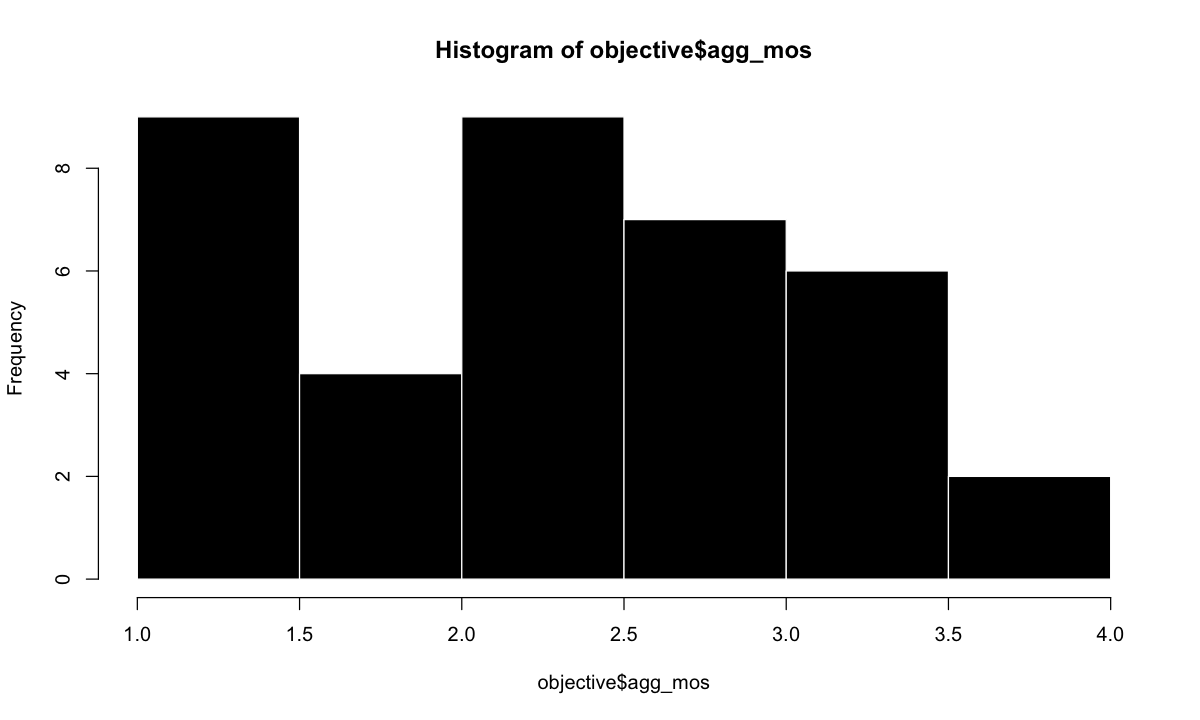

In [10]:
options(repr.plot.width = 10, repr.plot.height = 6)
#plot the target variable
par(bg = "white")  # set background color to white
hist(objective$agg_mos,
     col = "black",
     border = "white")

# BIG regression
### fit with all variables

In [37]:
fit <- lm(agg_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen
    + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya 
    + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen 
    + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya
    + avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google
    + distance + telstra_distance + urban + line_of_sight, data = objective)
summary(fit)


Call:
lm(formula = agg_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + 
    avg_ellen_jitter + avg_pl_ellen + avg_up_aadya + avg_down_aadya + 
    avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + 
    sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + 
    sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + 
    sd_pl_aadya + avg_down_google + avg_up_google + avg_rtt_google + 
    sd_down_google + sd_up_google + sd_rtt_google + distance + 
    telstra_distance + urban + line_of_sight, data = objective)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9375 -0.2145  0.0238  0.1942  0.5732 

Coefficients: (1 not defined because of singularities)
                  Estimate Std. Error t value Pr(>|t|)
(Intercept)       5.201118   4.211205   1.235    0.257
avg_up_ellen     -0.034108   0.036659  -0.930    0.383
avg_down_ellen    0.004541   0.027368   0.166    0.873
avg_rtt_ellen    -0.121048   0.129505  -0.935    0.381
avg_ellen_jitter  0.00

In [35]:
cor_matrix <- cor(objective[, c("avg_up_ellen", "avg_down_ellen", "avg_rtt_ellen", 
                                "avg_ellen_jitter", "avg_pl_ellen", "avg_up_aadya", 
                                "avg_down_aadya", "avg_rtt_aadya", "avg_jitter_aadya", 
                                "avg_pl_aadya", "sd_up_ellen", "sd_down_ellen", 
                                "sd_rtt_ellen", "sd_jitter_ellen", "sd_pl_ellen", 
                                "sd_up_aadya", "sd_down_aadya", "sd_rtt_aadya", 
                                "sd_jitter_aadya", "sd_pl_aadya", "avg_down_google", 
                                "avg_up_google", "avg_rtt_google", "sd_down_google", 
                                "sd_up_google", "sd_rtt_google", "distance", 
                                "telstra_distance", "line_of_sight")], use = "complete.obs")

# View correlation matrix
cor_matrix

Warning message in cor(objective[, c("avg_up_ellen", "avg_down_ellen", "avg_rtt_ellen", :
"the standard deviation is zero"


,avg_up_ellen,avg_down_ellen,avg_rtt_ellen,avg_ellen_jitter,avg_pl_ellen,avg_up_aadya,avg_down_aadya,avg_rtt_aadya,avg_jitter_aadya,avg_pl_aadya,...,sd_pl_aadya,avg_down_google,avg_up_google,avg_rtt_google,sd_down_google,sd_up_google,sd_rtt_google,distance,telstra_distance,line_of_sight
avg_up_ellen,1.00000000,0.03657220,-0.308469491,-0.32965725,0.169800548,0.60268898,0.2038965858,-0.35586526,-0.25038841,-0.08960863,...,-0.132429662,0.062623866,0.26019793,0.170506554,0.1474583078,NA,-0.16913640,-0.09479815,-0.29443053,0.54191179
avg_down_ellen,0.03657220,1.00000000,-0.083756973,-0.49035976,-0.198655591,0.37071995,0.6351156290,-0.14811594,-0.50802734,-0.15104719,...,-0.227410672,0.461210464,0.06760776,0.270388174,0.1245524171,NA,0.08273041,0.26151966,0.25647379,0.05955623
avg_rtt_ellen,-0.30846949,-0.08375697,1.000000000,0.60156865,-0.260778206,-0.16899929,-0.0535896925,0.54197384,0.29875629,0.03925433,...,0.069706878,0.078592643,0.28519090,0.003881135,-0.0568364110,NA,-0.34065489,0.26293079,0.35052982,0.21113251
avg_ellen_jitter,-0.32965725,-0.49035976,0.601568655,1.00000000,0.045103194,-0.16389477,-0.1157092077,0.20531590,0.24689866,0.31184420,...,0.357516263,-0.077192642,0.11129471,-0.149891757,-0.0906799279,NA,-0.12944435,-0.06583197,0.08587397,0.13807572
avg_pl_ellen,0.16980055,-0.19865559,-0.260778206,0.04510319,1.000000000,0.10926139,-0.0528208586,-0.39696551,-0.13506080,-0.06802853,...,-0.065222188,0.070124466,0.01427361,-0.071384361,0.0297398528,NA,-0.08626267,0.22559234,0.15384990,-0.10803018
avg_up_aadya,0.60268898,0.37071995,-0.168999285,-0.16389477,0.109261392,1.00000000,0.4707558181,-0.40235195,-0.39448213,-0.10269922,...,-0.134473906,0.183069650,0.31114243,0.065874925,0.1461660827,NA,-0.14755032,0.02676769,-0.11036335,0.54868769
avg_down_aadya,0.20389659,0.63511563,-0.053589692,-0.11570921,-0.052820859,0.47075582,1.0000000000,-0.33611232,-0.63241316,-0.20262015,...,-0.245055345,0.465686446,0.13084040,0.219763818,-0.0009188944,NA,0.07720417,0.19562885,0.04953779,0.29789109
avg_rtt_aadya,-0.35586526,-0.14811594,0.541973836,0.20531590,-0.396965507,-0.40235195,-0.3361123174,1.00000000,0.57407142,0.02027669,...,0.053160779,0.032307128,-0.10921669,0.157824897,-0.0814463703,NA,-0.13913202,0.15205414,0.33298397,-0.01456949
avg_jitter_aadya,-0.25038841,-0.50802734,0.298756287,0.24689866,-0.135060801,-0.39448213,-0.6324131587,0.57407142,1.00000000,0.16591813,...,0.181464908,-0.214169476,-0.12299113,-0.118829474,0.0403992652,NA,-0.00830538,-0.06396707,0.04401904,-0.02879433
avg_pl_aadya,-0.08960863,-0.15104719,0.039254331,0.31184420,-0.068028527,-0.10269922,-0.2026201495,0.02027669,0.16591813,1.00000000,...,0.963782597,0.032804115,-0.20576446,0.281655815,0.0559642735,NA,-0.28139593,-0.07857573,-0.09778075,-0.08654927


In [44]:
apply(objective, 2, var)
library(caret)
nzv <- nearZeroVar(objective, saveMetrics = TRUE)
nzv[nzv$zeroVar == TRUE, ]

Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"


identifier          avg_up_ellen        avg_down_ellen 
                   NA          1.393306e+02          4.689111e+02 
        avg_rtt_ellen      avg_ellen_jitter          avg_pl_ellen 
         3.341963e+01          1.418633e+02          1.077782e+01 
         avg_up_aadya        avg_down_aadya         avg_rtt_aadya 
         1.523674e+02          3.641871e+02          2.920880e+01 
     avg_jitter_aadya          avg_pl_aadya           sd_up_ellen 
         1.506975e+02          7.382922e-01          3.713136e+01 
        sd_down_ellen          sd_rtt_ellen       sd_jitter_ellen 
         8.710220e+01          1.675217e+01          2.216702e+02 
          sd_pl_ellen           sd_up_aadya         sd_down_aadya 
         2.791269e+00          4.998558e+01          1.067989e+02 
         sd_rtt_aadya       sd_jitter_aadya           sd_pl_aadya 
         7.366528e+00          2.271410e+02          1.717072e+00 
      avg_down_google         avg_up_google        avg_rtt_google 
         2.478131e+00          6.200766e-01          3.005380e+02 
       sd_down_google          sd_up_google         sd_rtt_google 
         8.475676e-03          0.000000e+00          9.062328e+01 
             distance      telstra_distance         line_of_sight 
         1.785916e-01          3.416974e-01          2.147147e-01 
telstra_line_of_sight                 urban           e_audio_mos 
         1.576577e-01          1.576577e-01          7.308492e-01 
          e_video_mos                 e_mos           a_audio_mos 
         5.050061e-01          5.242248e-01          7.706601e-01 
          a_video_mos                 a_mos         agg_audio_mos 
         6.776733e-01          6.609049e-01          7.512932e-01 
        agg_video_mos               agg_mos 
         6.339119e-01          5.929890e-01

,freqRatio,percentUnique,zeroVar,nzv
,<dbl>,<dbl>,<lgl>,<lgl>
sd_up_google,0,2.702703,TRUE,TRUE


In [36]:
pca_result <- prcomp(objective[, c("avg_up_ellen", "avg_down_ellen", "avg_rtt_ellen", 
                                   "avg_ellen_jitter", "avg_pl_ellen", "avg_up_aadya", 
                                   "avg_down_aadya", "avg_rtt_aadya", "avg_jitter_aadya", 
                                   "avg_pl_aadya", "sd_up_ellen", "sd_down_ellen", 
                                   "sd_rtt_ellen", "sd_jitter_ellen", "sd_pl_ellen", 
                                   "sd_up_aadya", "sd_down_aadya", "sd_rtt_aadya", 
                                   "sd_jitter_aadya", "sd_pl_aadya", "avg_down_google", 
                                   "avg_up_google", "avg_rtt_google", "sd_down_google", 
                                   "sd_up_google", "sd_rtt_google", "distance", 
                                   "telstra_distance", "line_of_sight")], 
                    scale. = TRUE)  # Standardize the data before applying PCA

# View the PCA summary to see the proportion of variance explained by each component
summary(pca_result)

# Use the first few principal components that explain the most variance
pca_components <- pca_result$x[, 1:5]  # Replace 1:5 with the number of components you want to keep

# Fit a new model using the principal components
pca_model <- lm(agg_mos ~ pca_components, data = objective)

# View the summary of the new model
summary(pca_model)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3425 2.0024 1.67860 1.56597 1.46175 1.38495 1.26661
Proportion of Variance 0.1892 0.1383 0.09716 0.08456 0.07368 0.06614 0.05532
Cumulative Proportion  0.1892 0.3275 0.42464 0.50920 0.58288 0.64903 0.70435
                           PC8    PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.09979 1.0729 1.00000 0.99414 0.89266 0.81703 0.75600
Proportion of Variance 0.04171 0.0397 0.03448 0.03408 0.02748 0.02302 0.01971
Cumulative Proportion  0.74605 0.7857 0.82023 0.85431 0.88179 0.90481 0.92452
                          PC15    PC16   PC17    PC18    PC19    PC20    PC21
Standard deviation     0.66371 0.58813 0.5673 0.49129 0.43398 0.41898 0.37332
Proportion of Variance 0.01519 0.01193 0.0111 0.00832 0.00649 0.00605 0.00481
Cumulative Proportion  0.93971 0.95163 0.9627 0.97105 0.97755 0.98360 0.98841
                         PC22    PC23    P


Call:
lm(formula = agg_mos ~ pca_components, data = objective)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43097 -0.33869 -0.01041  0.50014  1.08673 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.30824    0.10986  21.011  < 2e-16 ***
pca_componentsPC1  0.14466    0.04754   3.043  0.00475 ** 
pca_componentsPC2 -0.11095    0.05562  -1.995  0.05493 .  
pca_componentsPC3 -0.06078    0.06635  -0.916  0.36670    
pca_componentsPC4  0.08615    0.07112   1.211  0.23495    
pca_componentsPC5 -0.08558    0.07619  -1.123  0.26996    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6683 on 31 degrees of freedom
Multiple R-squared:  0.3515,	Adjusted R-squared:  0.2469 
F-statistic: 3.361 on 5 and 31 DF,  p-value: 0.01535


### visualise against certain significant variables

In [39]:
library(ggplot2)
ggplot2(MOS_test, aes(x = avg_up_ellen, y = agg_MOS)) +
  geom_point(color = "blue") +
  labs(title = "MOS score and ellen avg upload speed", x = "avg_up_ellen", y = "agg_MOS") +
  theme_minimal()

ERROR: Error in ggplot2(MOS_test, aes(x = avg_up_ellen, y = agg_MOS)): could not find function "ggplot2"


### perform and plot the predictions

Warning message in predict.lm(fit, objective):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"
Warning message in predict.lm(fit, objective):
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"


[1] 0.1197694

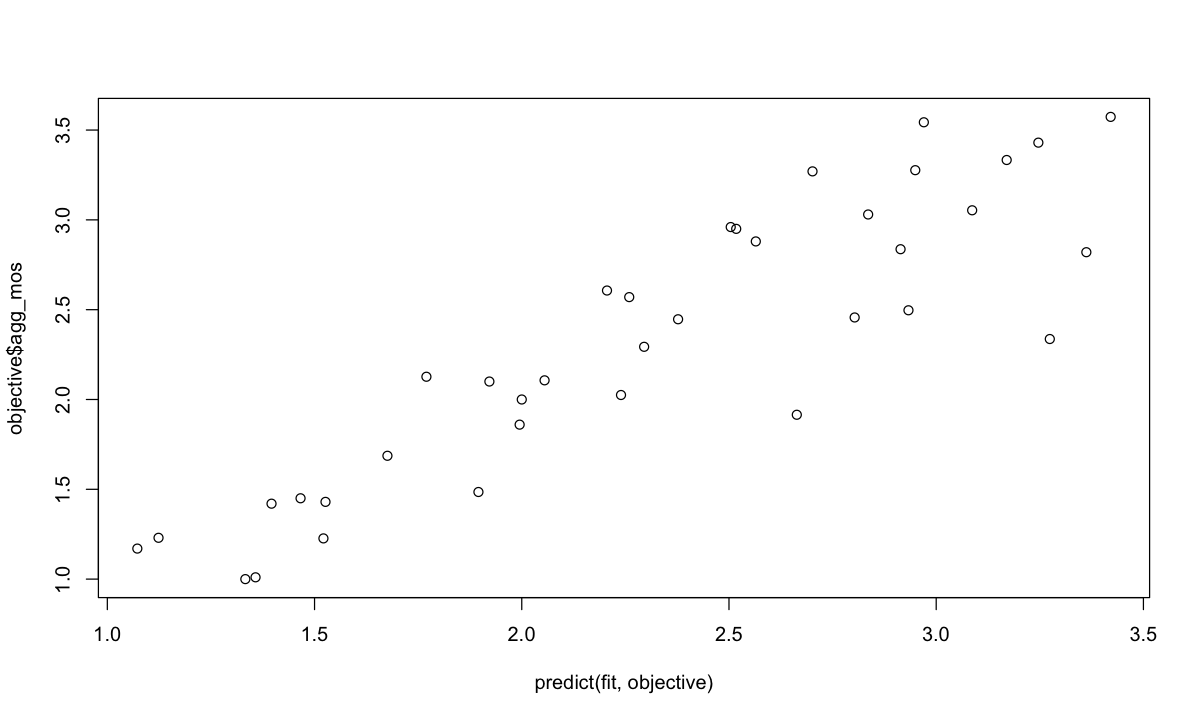

In [25]:
par(bg = "white")
predictions <- predict(fit, objective)
plot(predict(fit, objective), objective$agg_mos)
#calculate mean squared error
mean((predictions - objective$agg_mos)^2)

# Penalised regression 
### AIC

Start:  AIC=-18.52
agg_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya + 
    avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + 
    sd_up_google + sd_rtt_google + distance + telstra_distance + 
    urban + line_of_sight


Step:  AIC=-18.52
agg_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya + 
    avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + 
    sd_rtt_google + dista


Call:
lm(formula = agg_mos ~ avg_up_ellen + avg_rtt_ellen + avg_down_aadya + 
    avg_jitter_aadya + sd_up_ellen + sd_down_ellen + sd_jitter_ellen + 
    sd_down_aadya + sd_down_google + sd_rtt_google + distance, 
    data = objective)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05457 -0.20211 -0.02439  0.29802  0.72649 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.629985   1.074202   4.310 0.000223 ***
avg_up_ellen     -0.015079   0.009063  -1.664 0.108624    
avg_rtt_ellen    -0.078059   0.021478  -3.634 0.001259 ** 
avg_down_aadya    0.019193   0.006220   3.086 0.004909 ** 
avg_jitter_aadya -0.013166   0.009334  -1.411 0.170696    
sd_up_ellen      -0.032257   0.015349  -2.102 0.045828 *  
sd_down_ellen     0.022423   0.011547   1.942 0.063491 .  
sd_jitter_ellen  -0.020395   0.007199  -2.833 0.008984 ** 
sd_down_aadya    -0.033809   0.009545  -3.542 0.001588 ** 
sd_down_google    1.357797   0.936463   1.450 0.159511

[1] 0.155073

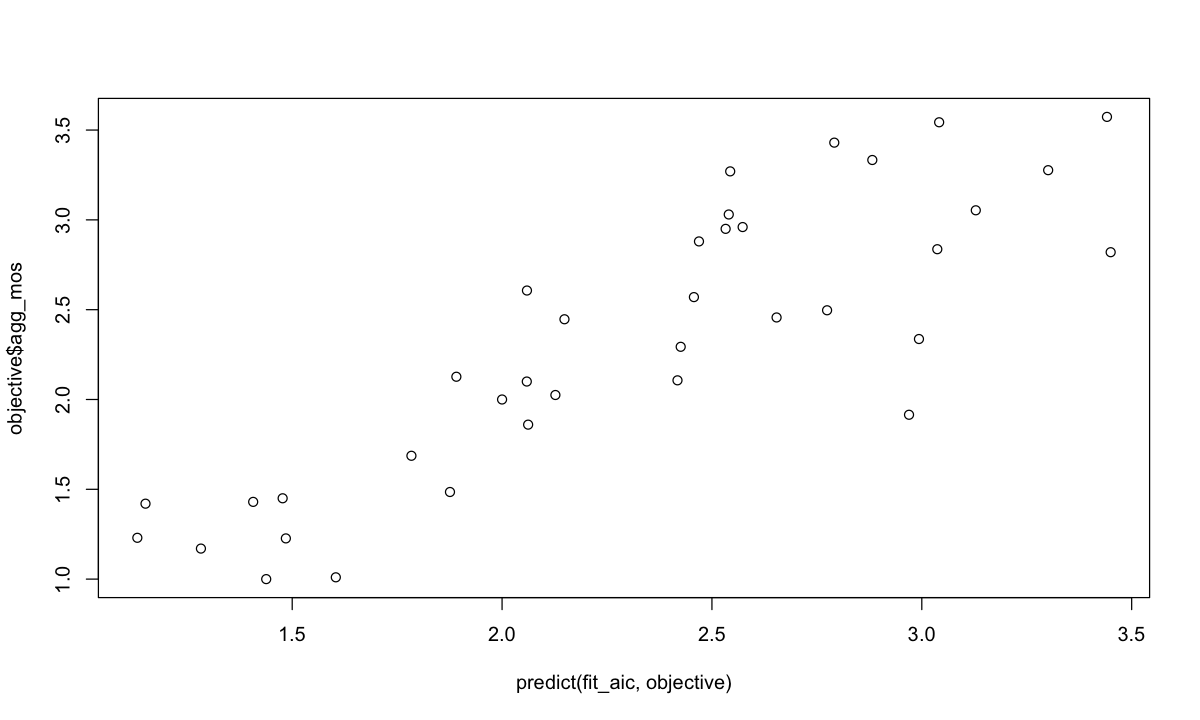

In [33]:
fit_aic <- step(fit) #stepwise regression to optimse a linear model
summary(fit_aic)
par(bg = "white")
plot(predict(fit_aic, objective), objective$agg_mos)
mean((predict(fit_aic, objective) - objective$agg_mos)^2)

### BIC

Start:  AIC=29.81
agg_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya + 
    avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + 
    sd_up_google + sd_rtt_google + distance + telstra_distance + 
    urban + line_of_sight


Step:  AIC=29.81
agg_mos ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya + 
    avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + 
    sd_rtt_google + distanc


Call:
lm(formula = agg_mos ~ avg_rtt_ellen + avg_down_aadya + sd_up_ellen + 
    sd_down_aadya + sd_rtt_google, data = objective)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21166 -0.30556 -0.02469  0.29140  1.14483 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5.494732   0.681269   8.065 4.16e-09 ***
avg_rtt_ellen  -0.096608   0.017932  -5.387 7.07e-06 ***
avg_down_aadya  0.021784   0.005169   4.214 0.000201 ***
sd_up_ellen    -0.036859   0.014910  -2.472 0.019127 *  
sd_down_aadya  -0.030268   0.010415  -2.906 0.006696 ** 
sd_rtt_google  -0.045941   0.010846  -4.236 0.000189 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5297 on 31 degrees of freedom
Multiple R-squared:  0.5925,	Adjusted R-squared:  0.5268 
F-statistic: 9.015 on 5 and 31 DF,  p-value: 2.264e-05


[1] 0.2351029

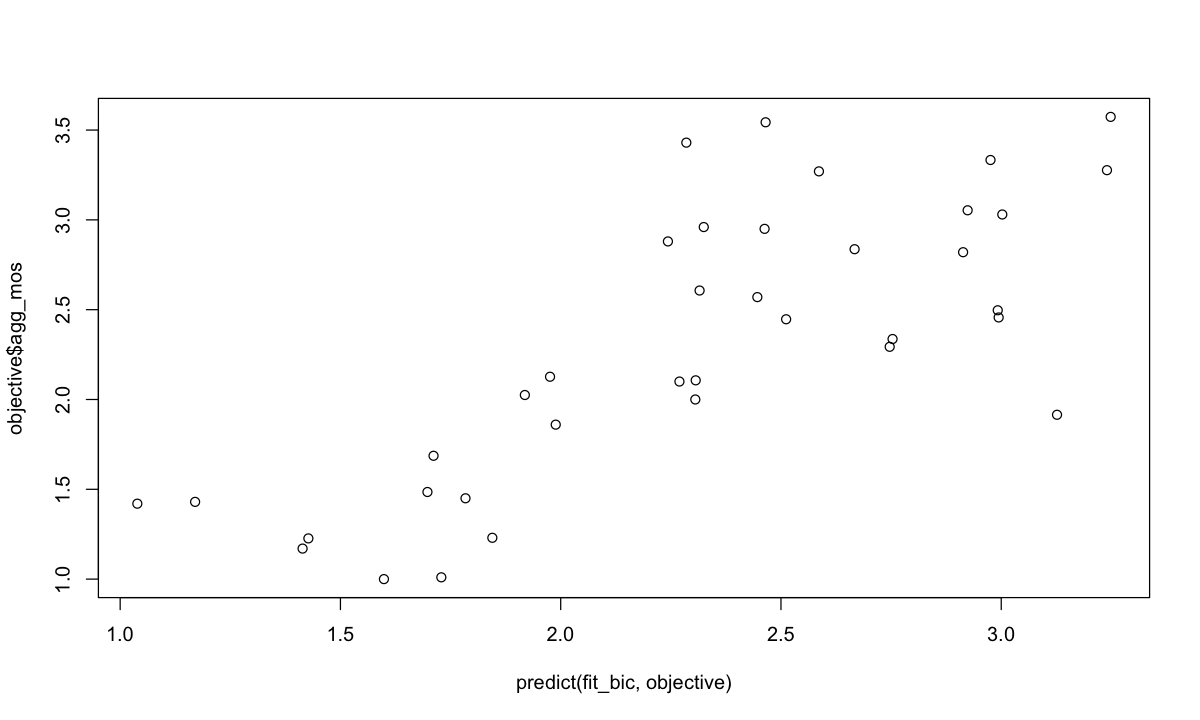

In [34]:
fit_bic <- step(fit, k = log(length(objective$agg_mos)))
summary(fit_bic)
par(bg = "white")
plot(predict(fit_bic, objective), objective$agg_mos)
mean((predict(fit_bic, objective) - objective$agg_mos)^2)